### Průhybová čára

Načtení nutných knihoven a zapnutí *LaTeX*ovského výpisu,

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image

In [2]:
sp.init_printing()

#### Zadání

U prutu podle obrázku stanovte příčný průřez s maximální hodnotu průhybu.

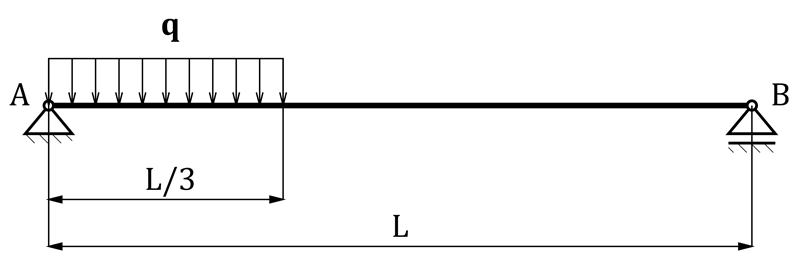

In [3]:
Image(filename='Pruhybova_cara.png',width=600)

#### Řešení

Zavedení nutných symbolů,

In [4]:
FA,FB,L,q=sp.symbols('FA FB L q')
E,J=sp.symbols('E J')
x1,x2=sp.symbols('x1 x2')
w1=sp.Function('w1')
w2=sp.Function('w2')
C1,C2,C3,C4=sp.symbols('C1 C2 C3 C4')

Nejdříve je nutné odstranit vazby. Vzhledem k tomu, že úloha je staticky určitá, nahradí se vazby $A$ a $B$ reakcemi $\boldsymbol{F}_A$ a $\boldsymbol{F}_B$, pro které platí následující soustava rovnic rovnováhy,

\begin{eqnarray}
&&\sum M_A: \quad F_BL-q\frac{L^2}{18}=0 \\
&&\sum M_B: \quad F_AL-q\frac{5L^2}{18}=0
\end{eqnarray}

Zapsáno *Python*ovsky,

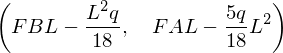

In [5]:
MA=FB*L-q*L**2/18
MB=FA*L-q*5*L**2/18
MA,MB

Řešení této soustavy je,

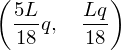

In [6]:
sol=sp.linsolve([MA,MB],[FA,FB])
FA_,FB_=next(iter(sol))
FA_,FB_

Odstranění vazeb umožňuje vyjádření výsledných vnitřních účinků $M_1$ a $M_2$ na úseku s liniovým zatížením a zbytku prutu. Tyto jsou nutné k vyjádření průhybové čáry prutu. Úseky $1$ a $2$ budeme uvolňovat zleva.

Úsek $1$ pro $x_1\in\left(0,\frac{L}{3}\right)$,

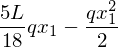

In [7]:
M1=-q*x1**2/2+FA_*x1
M1

Úsek $2$ pro $x_2\in\left(0,\frac{2L}{3}\right)$,

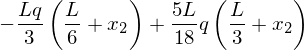

In [8]:
M2=-q*L/3*(x2+L/6)+FA_*(x2+L/3)
M2

Diferenciální rovnice průhybové čáry jsou dvě, pro každý úsek, a mají tvar,

\begin{eqnarray}
&&w_1''=-\frac{M_1}{EJ}\quad x_1\in\left(0,\frac{L}{3}\right) \\
&&w_2''=-\frac{M_2}{EJ}\quad x_2\in\left(0,\frac{2L}{3}\right)
\end{eqnarray}

*Úkol*: Uvolněte úsek $2$ zprava a napište odpovídající diferenciální rovnici jeho průhubové čáry.

Výše uvedené diferenciální rovnice se mohou v *sympy* zapsat následovně,

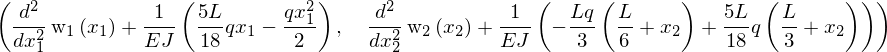

In [9]:
deqn1=w1(x1).diff(x1,x1)+M1/E/J
deqn2=w2(x2).diff(x2,x2)+M2/E/J
deqn1,deqn2

První rovnice má řešení,

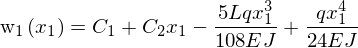

In [10]:
dsol1=sp.dsolve(deqn1,w1(x1))
dsol1

Druhá rovnice má řešení,

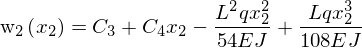

In [11]:
dsol2=sp.dsolve(deqn2,w2(x2))
dsol2_modified=dsol2.subs([(C1,C3),(C2,C4)])
dsol2_modified

kde $C_1$, $C_2$, $C_3$ a $C_4$ jsou neznámé konstanty, které se musí určit z okrajových podmínek a podmínek spojitosti (kompatibility) průhybové čáry,

Předchozí výrazy řešení $w_1$ a $w_2$ jsou objekty *Equality*, tedy rovnice, které se musí rozřešit pomocí příkazu *solve*, aby se s nimi mohlo dále pracovat,

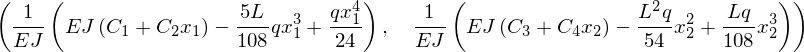

In [12]:
w1_=sp.solve(dsol1,w1(x1))
w2_=sp.solve(dsol2_modified,w2(x2))
w1,w2=w1_[0],w2_[0]
w1,w2

Předchozí krok umožňuje mimo jiné vyjádřit i derivace $w_1^\prime$, $w_2^\prime$,

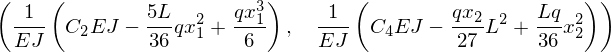

In [13]:
dw1=w1.diff(x1)
dw2=w2.diff(x2)
dw1,dw2

Konstanty $C_1$, $C_2$, $C_3$ a $C_4$ se určí z následujících okrajových pomínek a podmínek spojitosti a hladkosti průhybové čáry,

\begin{eqnarray}
&&x_1=0\,\Rightarrow\, w_1(0)=0 \\
&&x_1=\frac{L}{3}\,\wedge x_2=0\,\Rightarrow\, w_1\left( \frac{L}{3}\right)=w_2(0)\,\wedge\, w_1'\left( \frac{L}{3}\right)=w_2'(0) \\
&&x_2=\frac{2L}{3}\,\Rightarrow\, w_2\left(\frac{2L}{3}\right)=0
\end{eqnarray}

Zapsáno *Python*ovsky,

In [14]:
bc1=w1.subs(x1,0)
bc2=w1.subs(x1,L/3)-w2.subs(x2,0)
bc3=dw1.subs(x1,L/3)-dw2.subs(x2,0)
bc4=w2.subs(x2,2*L/3)

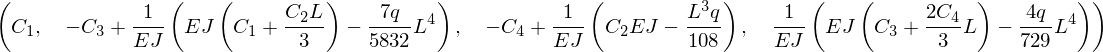

In [15]:
bc1,bc2,bc3,bc4

Výše sestavené okrajové podmínky tvoří soustavu algebraických rovnic pro neznámé $C_1$, $C_2$, $C_3$ a $C_4$. Její řešení je,

In [16]:
sol_bc=sp.linsolve([sp.expand(bc1),sp.expand(bc2),sp.expand(bc3),sp.expand(bc4)],[C1,C2,C3,C4])
C1_,C2_,C3_,C4_=next(iter(sol_bc))

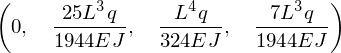

In [17]:
C1_,C2_,C3_,C4_

Zpětné dosazení vypočtených konstant do vztahů pro natočení a průhyb střenice vede na výrazy,

In [18]:
w1_solved=w1.subs({C1:C1_,C2:C2_})
dw1_solved=dw1.subs({C1:C1_,C2:C2_})
w2_solved=w2.subs({C3:C3_,C4:C4_})
dw2_solved=dw2.subs({C3:C3_,C4:C4_})

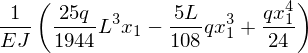

In [19]:
w1_solved

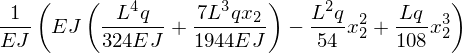

In [20]:
w2_solved

#### Vykreslení průhybové čáry:

\begin{eqnarray}
L&=&1\,\mathrm{m}\\
E&=&2.1\times 10^5\,\mathrm{MPa}\\
J&=&\frac{bh^3}{12}=\frac{20\times 50^3}{12}=208333\,\mathrm{mm}^4\\
q&=&10,20,30\,\mathrm{Nmm}
\end{eqnarray}

Zapsáno *Python*ovsky,

In [21]:
L_in=1000
E_in=2.1e5
b=20
h=50
J_in=b*h**3/12

Samotné vykreslení pro různé hodnoty $\boldsymbol{q}$,

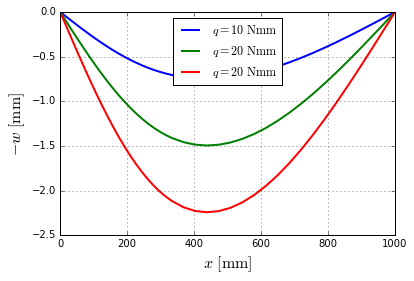

In [22]:
xI=np.linspace(0,L_in/3,20)
wI10=[-w1_solved.evalf(subs={x1:ii,q:10,L:L_in,E:E_in,J:J_in}) for ii in xI]
wI20=[-w1_solved.evalf(subs={x1:ii,q:20,L:L_in,E:E_in,J:J_in}) for ii in xI]
wI30=[-w1_solved.evalf(subs={x1:ii,q:30,L:L_in,E:E_in,J:J_in}) for ii in xI]
xII=np.linspace(L_in/3,L_in,20)
wII10=[-w2_solved.evalf(subs={x2:ii-L/3,q:10,L:L_in,E:E_in,J:J_in}) for ii in xII]
wII20=[-w2_solved.evalf(subs={x2:ii-L/3,q:20,L:L_in,E:E_in,J:J_in}) for ii in xII]
wII30=[-w2_solved.evalf(subs={x2:ii-L/3,q:30,L:L_in,E:E_in,J:J_in}) for ii in xII]
x=[]

for ii in xI:
    x.append(ii)
    
for ii in xII:
    x.append(ii)
    
w10=wI10+wII10
w20=wI20+wII20
w30=wI30+wII30
fig,ax=plt.subplots()
plt.ylabel(r'$-w\ \mathrm{[mm]}$').set_fontsize(16)
plt.xlabel(r'$x\ \mathrm{[mm]}$').set_fontsize(16)
ax.plot(x,w10,label=r'$q=10\ \mathrm{Nmm}$',lw=2)
ax.plot(x,w20,label=r'$q=20\ \mathrm{Nmm}$',lw=2)
ax.plot(x,w30,label=r'$q=20\ \mathrm{Nmm}$',lw=2)
ax.legend(loc='upper center')
ax.grid(True)

Nejvíce prohnutý příčný průřez se dostane ze vztahu,

\begin{equation}
\frac{\mathrm{d}w_2(x_2)}{\mathrm{d}x_2}=0\Rightarrow x_{w_{max}}
\end{equation}

In [23]:
xI10_sol=sp.solve(dw2_solved.subs({q:10,L:L_in,E:E_in,J:J_in}),x2)
x10=L_in/3+xI10_sol[0]
wmax10=w2_solved.subs({q:10,L:L_in,E:E_in,J:J_in,x2:xI10_sol[0]})
xI20_sol=sp.solve(dw2_solved.subs({q:20,L:L_in,E:E_in,J:J_in}),x2)
x20=L_in/3+xI20_sol[0]
wmax20=w2_solved.subs({q:20,L:L_in,E:E_in,J:J_in,x2:xI20_sol[0]})
xI30_sol=sp.solve(dw2_solved.subs({q:30,L:L_in,E:E_in,J:J_in}),x2)
x30=L_in/3+xI30_sol[0]
wmax30=w2_solved.subs({q:30,L:L_in,E:E_in,J:J_in,x2:xI30_sol[0]})
print 'x10={} mm: wmax={} mm\nx20={} mm: wmax={} mm\nx30={} mm: wmax={} mm'.format(x10,wmax10,x20,wmax20,x30,wmax30)

x10=438.583058979885 mm: wmax=0.747672866327559 mm
x20=438.583058979884 mm: wmax=1.49534573265512 mm
x30=438.583058979885 mm: wmax=2.24301859898268 mm
